In [1]:
import numpy as np 
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras
from sklearn.metrics import classification_report
import matplotlib.image as mpimg
import time

In [2]:
path_to_images = './archive/train'
haars_cascade_frontal_face = './haarcascade_frontalface_default.xml'
haars_cascade_eye = './haarcascade_eye.xml'

labels = os.listdir(path_to_images)
labels

['no_yawn', 'yawn']

In [3]:
yawn_dataset = os.path.join(path_to_images,'yawn')
no_yawn_dataset = os.path.join(path_to_images,'no_yawn')

In [4]:
print(f"yawn dataset: {os.listdir(yawn_dataset)[0:10]}" )
print(f"no_yawn dataset: {os.listdir(no_yawn_dataset)[0:10]}" )

yawn dataset: ['1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg', '103.jpg', '104.jpg', '105.jpg', '106.jpg', '107.jpg']
no_yawn dataset: ['1.jpg', '1003.jpg', '1004.jpg', '1006.jpg', '1007.jpg', '1008.jpg', '1009.jpg', '1010.jpg', '1021.jpg', '1028.jpg']


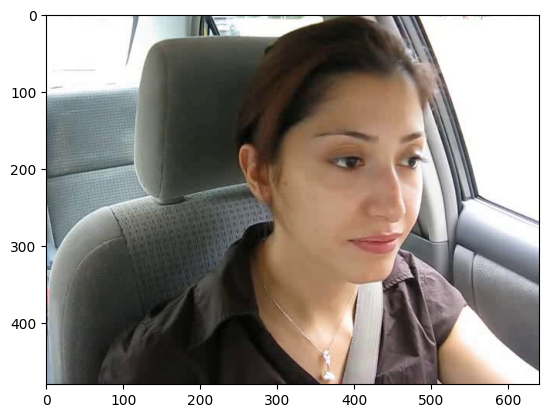

In [7]:
image = plt.imread(path_to_images+f"/yawn/{os.listdir(yawn_dataset)[0]}")
plt.imshow(image)

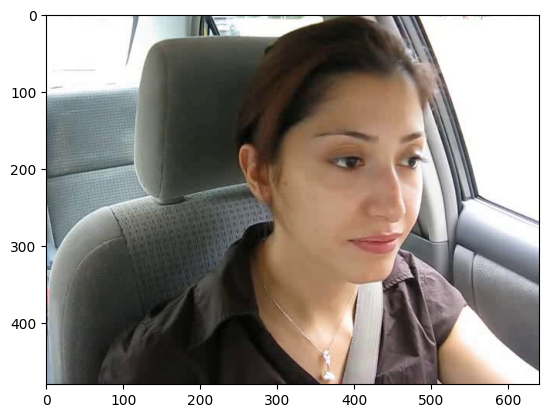

In [8]:
image = plt.imread(path_to_images+f"/no_yawn/{os.listdir(no_yawn_dataset)[0]}")
plt.imshow(image)

In [9]:
path_link = os.path.join(path_to_images, labels[0])
os.listdir(path_link)

['1.jpg',
 '1003.jpg',
 '1004.jpg',
 '1006.jpg',
 '1007.jpg',
 '1008.jpg',
 '1009.jpg',
 '1010.jpg',
 '1021.jpg',
 '1028.jpg',
 '1029.jpg',
 '1030.jpg',
 '1031.jpg',
 '1032.jpg',
 '1033.jpg',
 '1034.jpg',
 '1038.jpg',
 '1039.jpg',
 '1042.jpg',
 '1044.jpg',
 '1046.jpg',
 '1047.jpg',
 '1050.jpg',
 '1061.jpg',
 '1062.jpg',
 '1063.jpg',
 '1067.jpg',
 '1068.jpg',
 '1069.jpg',
 '1073.jpg',
 '1074.jpg',
 '1096.jpg',
 '1097.jpg',
 '1098.jpg',
 '111.jpg',
 '1111.jpg',
 '1114.jpg',
 '1116.jpg',
 '1117.jpg',
 '1118.jpg',
 '112.jpg',
 '1120.jpg',
 '1121.jpg',
 '1122.jpg',
 '1128.jpg',
 '1129.jpg',
 '113.jpg',
 '1130.jpg',
 '1131.jpg',
 '1132.jpg',
 '1133.jpg',
 '1134.jpg',
 '1139.jpg',
 '114.jpg',
 '115.jpg',
 '117.jpg',
 '1172.jpg',
 '1173.jpg',
 '1174.jpg',
 '1176.jpg',
 '1177.jpg',
 '1178.jpg',
 '1201.jpg',
 '1202.jpg',
 '1203.jpg',
 '1208.jpg',
 '1209.jpg',
 '1210.jpg',
 '1213.jpg',
 '1214.jpg',
 '1246.jpg',
 '1247.jpg',
 '1248.jpg',
 '1250.jpg',
 '1261.jpg',
 '1266.jpg',
 '1267.jpg',
 '1268.j

In [10]:
#para yawn e not_yawn fazemos a captura apenas da face

def yawn_face():
    yaw_no = []
    IMG_SIZE = 145
    for label in labels:
        path_link = os.path.join(path_to_images, label)
        class_num1 = labels.index(label)
        print(class_num1)
        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
            face_cascade = cv2.CascadeClassifier(haars_cascade_frontal_face)
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)#detecção de varios rostos -> ajustar parametros depoi
                                                                      #testar com outros dados
            for (x, y, w, h) in faces:
                img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
                roi_color = img[y:y+h, x:x+w]
                resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                yaw_no.append([resized_array, class_num1])
    return yaw_no


In [11]:
yaw_no = yawn_face()
print(type(yaw_no))
yaw_no = np.array(yaw_no, dtype=object)#converter para numpy
print(type(yaw_no))

0
1
<class 'list'>
<class 'numpy.ndarray'>


In [12]:
len(yaw_no)

472

In [13]:
X = []
y = []
for feature, label in yaw_no:
    X.append(feature)
    y.append(label)

In [14]:
len(X),len(y)

(472, 472)

In [258]:
#sem aplicar encoding classes

In [15]:
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

In [16]:
X.shape

(472, 145, 145, 3)

In [17]:
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

In [18]:
y = np.array(y)

In [19]:
y.shape

(472, 1)

In [20]:
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

In [21]:
len(X_train),len(X_test),len(y_train),len(y_test)

(330, 142, 330, 142)

In [43]:
X_train[:1],X_test[:1],y_train[:1],y_test[:1]

(array([[[[  0, 255,   0],
          [  0, 255,   0],
          [  0, 255,   0],
          ...,
          [  0, 255,   0],
          [  0, 255,   0],
          [  0, 255,   0]],
 
         [[  0, 255,   0],
          [  5, 206,  12],
          [ 11, 151,  25],
          ...,
          [ 47, 189,  58],
          [ 66, 207,  75],
          [ 11, 248,  13]],
 
         [[  0, 255,   0],
          [ 11, 151,  24],
          [ 24,  33,  54],
          ...,
          [ 85,  98, 111],
          [125, 135, 145],
          [ 22, 239,  25]],
 
         ...,
 
         [[  0, 255,   0],
          [ 39, 193,  83],
          [ 82, 120, 178],
          ...,
          [ 69,  77,  79],
          [ 68,  76,  78],
          [ 10, 227,  12]],
 
         [[  0, 255,   0],
          [ 39, 193,  84],
          [ 83, 121, 179],
          ...,
          [ 69,  76,  79],
          [ 69,  76,  79],
          [ 11, 227,  12]],
 
         [[  0, 255,   0],
          [  6, 245,  13],
          [ 13, 234,  28],
   

In [22]:
#data augmentation

gen_train = ImageDataGenerator(rescale=1/255, zoom_range=0.3, horizontal_flip=True, rotation_range=45)
gen_test = ImageDataGenerator(rescale=1/255)

gen_train = gen_train.flow(np.array(X_train), y_train, shuffle=False)#manter shuffle false
gen_test = gen_test.flow(np.array(X_test), y_test, shuffle=False)#manter shuffle false

In [23]:
len(gen_train),len(gen_test),len(gen_train),len(gen_test)

(11, 5, 11, 5)

In [24]:
model = Sequential()

model.add(Conv2D(128, (3, 3),activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid")) #uma classe de saída

# model.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate*10),#multiplicação arbitraria
#     loss = tf.keras.losses.BinaryFocalCrossentropy(),#função de custo otimizado quando a saida é binaria
#     metrics=['accuracy'] #metrica de acuaracia ou precisão
# )

model.compile(
    loss="binary_crossentropy",
    metrics=["accuracy"],
    #optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate*10)
    optimizer='adam'
)


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 143, 143, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 71, 71, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 34, 34, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0

In [25]:
initial_time = time.time()

history = model.fit(gen_train, epochs=50, validation_data=gen_test, shuffle=True)

final_time = time.time()

Epoch 1/50
11/11 [==============================] - 41s 3s/step - loss: 0.6980 - accuracy: 0.5152 - val_loss: 0.6847 - val_accuracy: 0.6901
Epoch 2/50
11/11 [==============================] - 56s 5s/step - loss: 0.6887 - accuracy: 0.5727 - val_loss: 0.6766 - val_accuracy: 0.7535
Epoch 3/50
11/11 [==============================] - 64s 6s/step - loss: 0.6689 - accuracy: 0.6182 - val_loss: 0.5951 - val_accuracy: 0.7465
Epoch 4/50
11/11 [==============================] - 64s 6s/step - loss: 0.6452 - accuracy: 0.5909 - val_loss: 0.5092 - val_accuracy: 0.7817
Epoch 5/50
11/11 [==============================] - 44s 4s/step - loss: 0.5477 - accuracy: 0.7242 - val_loss: 0.4885 - val_accuracy: 0.7887
Epoch 6/50
11/11 [==============================] - 50s 5s/step - loss: 0.5386 - accuracy: 0.7394 - val_loss: 0.4734 - val_accuracy: 0.7746
Epoch 7/50
11/11 [==============================] - 54s 5s/step - loss: 0.5280 - accuracy: 0.7424 - val_loss: 0.4894 - val_accuracy: 0.7887
Epoch 8/50
11/11 [==

In [26]:
total_time = final_time - initial_time
print(f"Tempo total de treinamento: {(total_time/60)/60} horas")

Tempo total de treinamento: 0.5784807510508432 horas


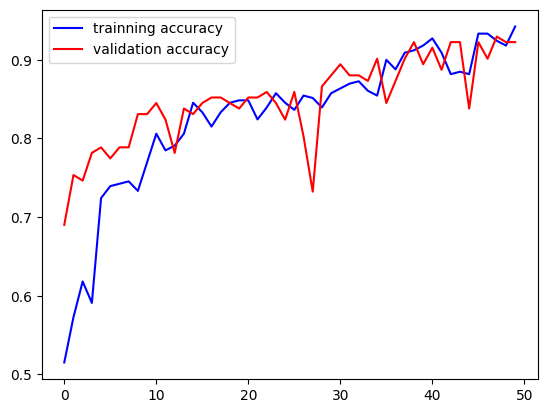

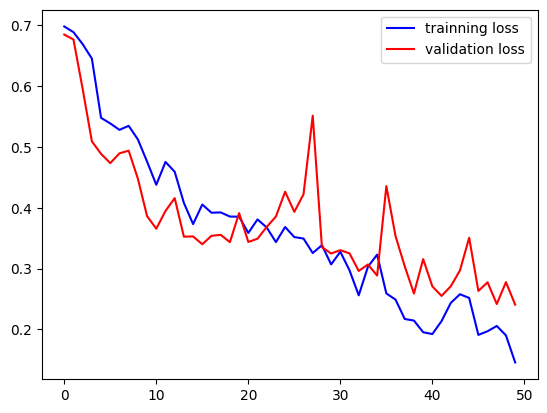

In [27]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [80]:
len(os.listdir(os.path.join(path_to_images,'yawn')))

723

In [87]:
###validando yawn images
rights = 0 #classes corretas
wrongs = 0 #classes erradas
    
for img in os.listdir(os.path.join(path_to_images,'yawn')):
    IMG_SIZE = 145

    resized_array = np.array([])
#     print(path_to_images+f"/no_yawn/"+img)
    path_link = os.path.join(path_to_images, 'yawn')

    image_array = cv2.imread(os.path.join(path_link, img), cv2.IMREAD_COLOR)
    face_cascade = cv2.CascadeClassifier(haars_cascade_frontal_face)
    faces = face_cascade.detectMultiScale(image_array, 1.3, 5)#detecção de varios rostos -> ajustar parametros depoi
                                                              #testar com outros dados
    for (x, y, w, h) in faces:
        img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
        roi_color = img[y:y+h, x:x+w]
        resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
        np.array(resized_array).reshape(-1, 145, 145, 3)
        prediction = model.predict(np.array(resized_array).reshape(-1, 145, 145, 3), verbose=0)
        print(prediction[0])
#         if(prediction[0] > [1.]):
#             print(prediction)
#             rights = rights + 1
#         else:
#             wrongs = wrongs + 1
#         print(resized_array)
#         yaw_no.append([resized_array, class_num1])


[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[3.1801246e-05]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[2.4140962e-37]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.99999994]
[0.9999997]
[0.99999994]
[1.]
[4.628577e-30]
[1.9974607e-20]
[1.]
[1.]
[0.9526357]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[0.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1

In [56]:
#['no_yawn', 'yawn'] como vemos o é classe 

In [82]:
prediction = model.predict(X_test, verbose=0)
prediction

array([[1.26781245e-38],
       [7.31705156e-23],
       [0.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [1.51818697e-11],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.59020695e-36],
       [1.00000000e+00],
       [1.17600797e-28],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.77508008e-10],
       [1.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [2.60901269e-17],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.05269440e-18],
       [1.00000000e+00],
       [3.06404433e-30],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],


In [88]:
score = model.evaluate(X_test, y_test, verbose=0)
print(score)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

[15.568241119384766, 0.9014084339141846]
Test loss: 15.568241119384766
Test accuracy: 0.9014084339141846


In [89]:
model.save("prediction_yawn_no_yawn.h5")